In [2]:
import os 
from pathlib import Path
from icecream import ic 
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



In [3]:
DATA_PATH = "datasets/questions/"

master_df = pd.read_csv(DATA_PATH+"/all/"+"master.csv")

In [4]:
master_df['answer'] = np.where((master_df['qtype'] == 'count-complex') & (master_df['answer'] == '1.0'),'1',master_df['answer'] )
master_df['answer'] = np.where((master_df['qtype'] == 'count-complex') & (master_df['answer'] == '0.0'),'0',master_df['answer'] )
master_df['answer'] = np.where((master_df['qtype'] == 'count-complex') & (master_df['answer'] == '2.0'),'2',master_df['answer'] )
master_df['answer'] = np.where((master_df['qtype'] == 'count-complex') & (master_df['answer'] == '3.0'),'3',master_df['answer'] )
master_df['answer'] = np.where((master_df['qtype'] == 'count-complex') & (master_df['answer'] == '10.0'),'10',master_df['answer'])

In [5]:
sub_df = master_df[(master_df['splittype']=='train') & (master_df['qtype'].isin (['count','count-complex','position','junction']))] 
sub_df


,splittype,file,question,answer,qtype,symbol
0,train,d3_7_jpg.rf.31bf0c5e0778dba314bbf2fe362e1d6e,How many components are there in the circuit t...,8,count,resistor
1,train,d3_7_jpg.rf.31bf0c5e0778dba314bbf2fe362e1d6e,Could you specify the quantity of crossovers i...,9,count,crossover
2,train,d3_7_jpg.rf.31bf0c5e0778dba314bbf2fe362e1d6e,Can you determine the number of gnds in the ci...,1,count,gnd
3,train,d4_195_png.rf.81434b70da426c9f6e22d496e0fec8e5,What is the total nand count within the circuit?,1,count,nand
4,train,d4_195_png.rf.81434b70da426c9f6e22d496e0fec8e5,Could you specify the quantity of ands in the ...,1,count,and
...,...,...,...,...,...,...
115577,train,d2_C7_D2_P2,How many voltage-dc are connected directly to ...,1,count-complex,voltage-dc
115578,train,d2_C7_D2_P2,How many resistor are connected directly to th...,1,count-complex,resistor
115579,train,d2_C7_D2_P2,How many voltage-dc are connected directly to ...,0,count-complex,voltage-dc
115580,train,d2_C7_D2_P2,How many voltage-dc are connected directly to ...,0,count-complex,voltage-dc


In [6]:
nums = ['0', '1','2','3','4','5','6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '26', '29','30', '31', '32', '33', '34', '41', '42', '43', '44', '46', '47', '49', '50','acv', 'ammeter', 'and', 'antenna', 'arr', 'capacitor', 'capacitor-unpolarized', 'capacitor.adjustable', 'capacitor.polarized', 'crossover', 'current-source', 'diode', 'diode.light_emitting', 'diode.zener', 'fuse', 'gnd', 'inductor', 'inductor.ferrite', 'integrated_circuit', 'integrated_circuit.ne555', 'integrated_circuit.voltage_regulator', 'lamp', 'microphone', 'motor', 'multi-cell-battery', 'nand', 'no', 'nor', 'not', 'operational_amplifier', 'optocoupler', 'or', 'probe', 'probe.current', 'relay', 'resistor', 'resistor.adjustable', 'resistor.photo', 'single-cell-battery', 'socket', 'speaker', 'switch', 'terminal', 'thyristor', 'transformer', 'transistor', 'transistor.bjt', 'transistor.fet', 'transistor.photo', 'triac', 'varistor', 'voltage-ac', 'voltage-dc', 'voltage-dc_ac', 'voltage.battery', 'voltmeter', 'vss', 'xnor', 'xor', 'yes']

#sorted(sub_df['answer'].unique())



ic| sub_df.columns: Index(['splittype', 'file', 'question', 'answer', 'QuestionType', 'symbol'], dtype='object')


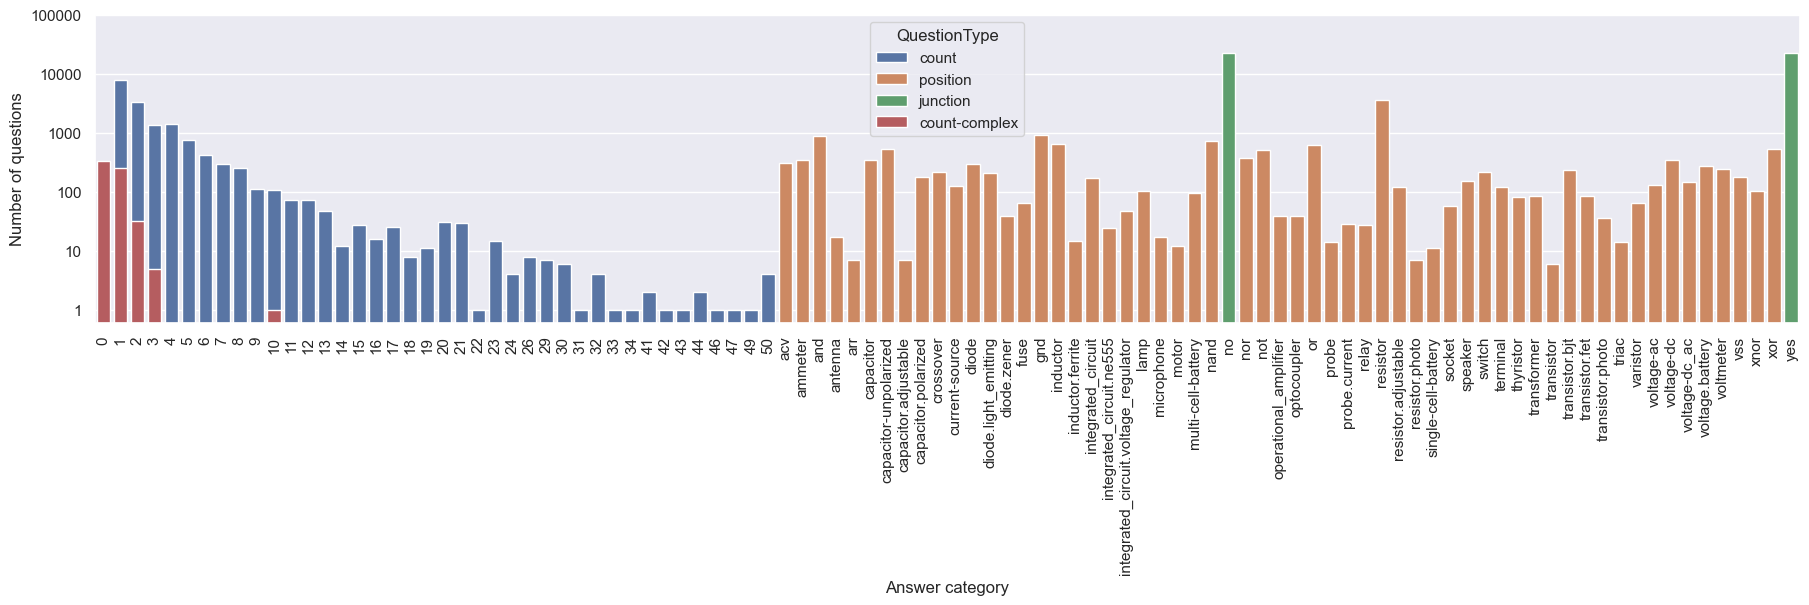

In [9]:
sns.set(rc={'figure.figsize':(22,4)})

sub_df = sub_df.rename(columns={'qtype':'QuestionType'})
ic(sub_df.columns)
g = sns.countplot(data=sub_df,x="answer",hue='QuestionType',dodge=False,order=nums) # ,y="")
g.set_yscale("log")
plt.xlabel('Answer category')
plt.ylabel('Number of questions')
plt.xticks(rotation=90)
plt.yticks(ticks=np.array([1,10,100,1000,10000,100000]),labels=np.array([1,10,100,1000,10000,100000]))

#plt.show()
plt.savefig("datasets/questions/results/stat-answers.png")